## 1.2: The Chain Rule — Powering Backpropagation in Neural Networks

1. What is the Chain Rule?
> The chain rule allows us to compute the derivative of a function composed of multiple nested functions.

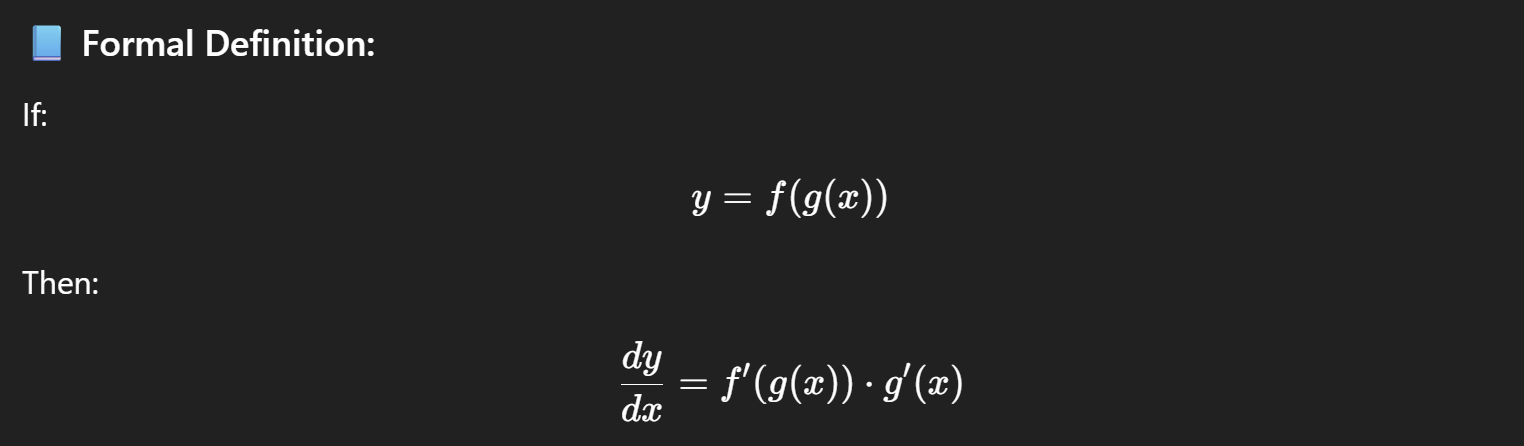

In words:
> "The derivative of the outer function times the derivative of the inner function."


### Why This Matters in ML:

Every neural network is just a series of nested functions:

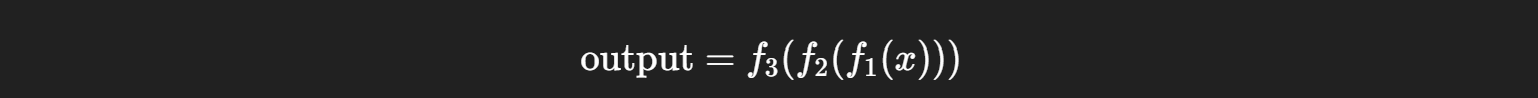

So, to compute how the loss changes with respect to input (or weights), we use the chain rule repeatedly during backpropagation.

Visual Example: Three-Layer Neural Network

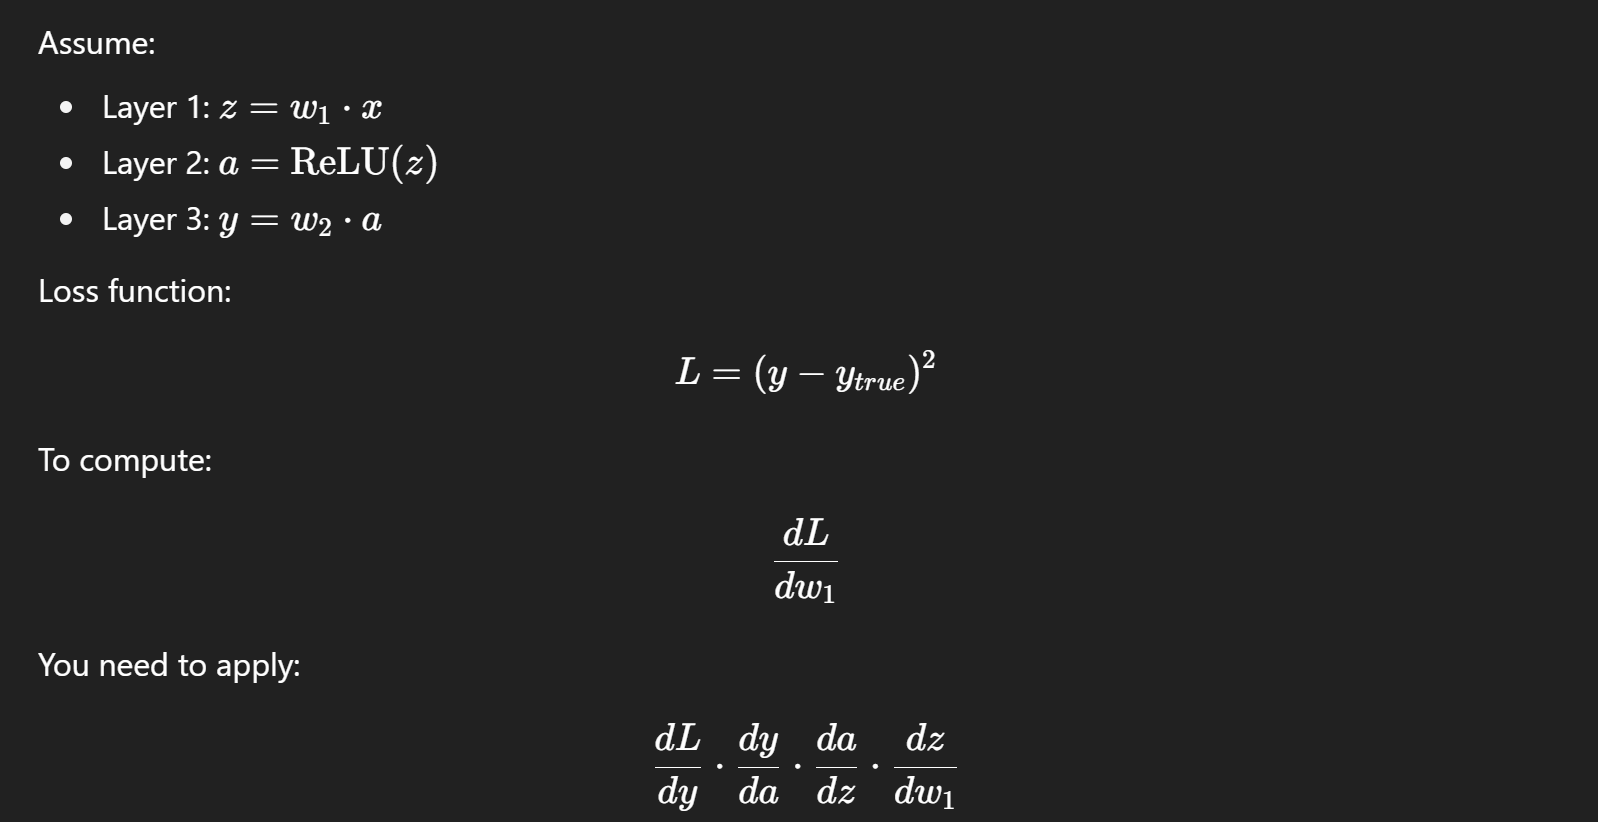

In [5]:
### Example derivative of a nested using sympy

from sympy import symbols, Function, diff

x = symbols('x')
g = Function('g')(x)
f = Function('f')(g)

# Chain rule: df/dx = df/dg * dg/dx
dfdx = diff(f, g) * diff(g, x)
print("df/dx =", dfdx)

df/dx = Derivative(f(g(x)), g(x))*Derivative(g(x), x)


In [4]:
import torch

x = torch.tensor([1.0], requires_grad=True)
y = x ** 3 + 2 * x

y.backward()
print(x.grad)  # prints the derivative dy/dx at x = 1

tensor([5.])


This prints `5.0` because:

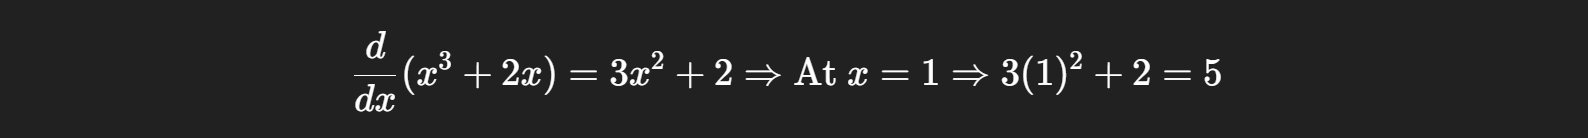

### Interview Focus

1. Why is the chain rule essential in neural networks?

> The chain rule is essential in neural networks because it allows us to compute the derivative of the loss function with respect to each weight in the network, even when the network is composed of many nested functions (layers). It makes backpropagation possible, allowing gradients to flow backward from the output to the input layer.

2. How does backpropagation use the chain rule?

> Backpropagation applies the chain rule recursively to compute the gradient of the loss function with respect to each weight. It does this by calculating local gradients at each layer, then multiplying them backward to propagate the error signal efficiently.

3. What happens if a layer’s activation has zero derivative?

> If a layer’s activation has a zero derivative, the gradient flowing through that layer becomes zero, which means no learning occurs for weights in that layer. This is known as the “vanishing gradient problem” — common with saturated activations like sigmoid or dead neurons in ReLU.


### Applied/Coding Interview Prompts (Concrete Practice Problems)

1. Given a composed function, compute the gradient manually

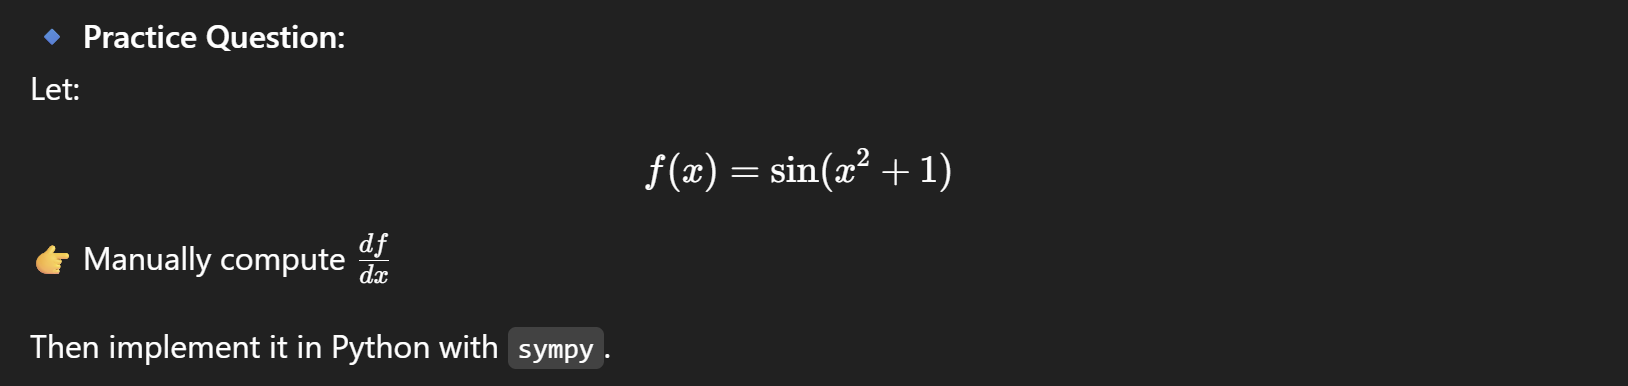

In [15]:
### Solution
from sympy import symbols, sin, diff

x = symbols('x')
f = sin(x ** 2 +1)

dfdx = diff(f, x)
print("df/dx =", dfdx)

df/dx = 2*x*cos(x**2 + 1)


In [14]:
### Solution using nested function style
from sympy import symbols, Function, diff, sin

# Step 1: Define symbol
x = symbols('x')

# Step 2: Define nested functions
g = Function('g')(x)         # g(x) = x^2 + 1
f = Function('f')(g)         # f(g) = sin(g)

# Step 3: Apply symbolic chain rule
dfdx = diff(f, g) * diff(g, x)

# Step 4: Substitute actual expressions
g_expr = x**2 + 1
f_expr = sin(g_expr)

# Compute final derivative
final_derivative = diff(f_expr, x)
print("df/dx =", final_derivative)

df/dx = 2*x*cos(x**2 + 1)


2. Implement backpropagation in a 2-layer neural network (NumPy)

Build and train a 2-layer NN using NumPy only:

- 1 input layer (2 features)
- 1 hidden layer (3 neurons, ReLU)
- 1 output layer (1 neuron, sigmoid)
- Loss = binary cross-entropy

✅ Compute **forward pass, loss, and backward pass** manually (no autograd).

In [ ]:
### Solution

3. Visualize how the gradient flows in a computational graph

Use a visual tool like https://www.wandb.ai/, TensorBoard, or build a custom flow using graphviz or networkx.

Or visualize gradients flowing through:

```
import torch

x = torch.tensor([2.0], requires_grad=True)
y = torch.sin(x**2 + 1)
y.backward()
print(x.grad)  # this is chain rule in action!
```

Explain what parts of the graph correspond to inner and outer functions. Draw arrows from input to loss.

In [ ]:
### Solution